In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [17]:
# Define the stock symbol and date range
stock_symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2021-12-31"

# Download historical data from Yahoo Finance
data = yf.download(stock_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [24]:
# Select the 'Close' price as the target variable
data = data[['Close']]

# Create a feature that represents the day
data['Day'] = range(1, len(data) + 1)

# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data, test_data = data[:train_size], data[train_size:]

# Separate the features (X) and target variable (y)
X_train, y_train = train_data[['Day']], train_data['Close']
X_test, y_test = test_data[['Day']], test_data['Close']


In [19]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [21]:
# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4216.095601577102


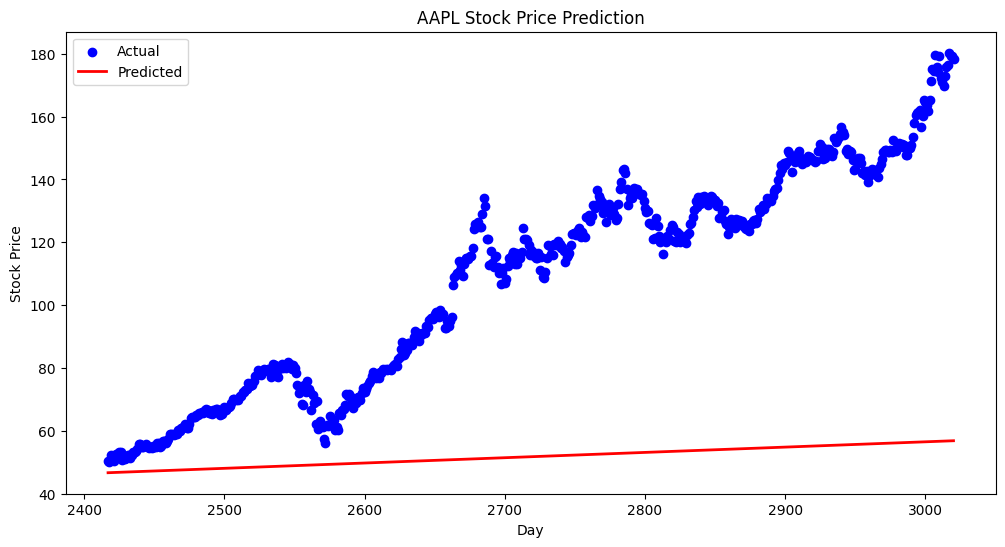

In [22]:
# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
